In [1]:
!kaggle datasets list

ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                      Uber Data Analytics Dashboard                        17324552  2025-08-08 11:13:42.920000          44934       1005  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                      24336  2025-07-24 16:30:01.617000          24893        423  1.0              
navjotkaushal/coffee-sales-dataset                               Coffee Sales Dataset                                    38970  2025-08-19 09:37:30.057000           7409         87  0.8235294        


In [2]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey
import zipfile

# 다운로드한 zip 파일 경로
zip_path = "mental-health-in-tech-survey.zip"

# 압축 풀 경로
extract_path = "./mental_health"

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
mental-health-in-tech-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import pandas as pd

#데이터셋 가져오기
df = pd.read_csv("./mental_health/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
#### 연구 질문
##### 1. 가족력/치료 경험이 업무 방해(work_interfere)와 어떤 관련이 있는가?
##### 2. 회사의 정신건강 지원 제도(benefits, care_options, wellness_program) 
#####    유무에 따라 직원 태도(mental_health_consequence, anonymity, leave)가 달라지는가?

In [6]:
# 남/녀 두 개의 범주로 성별을 구분하기 위한 성별답변 확인
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [7]:
import re
import numpy as np
import pandas as pd

def normalize_gender_binary(x: str):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()

    # 기초 정리
    s = re.sub(r'[^a-z+/\-\s]', ' ', s)  # 영문/+,/, -/공백만 남김
    s = re.sub(r'\s+', ' ', s).strip()

    # 보조: 'cis' 제거 (남/여 판정엔 불필요한 수식어)
    s_cisless = re.sub(r'\bcis\b', '', s).strip()

    # 1) 여성으로 확정되는 패턴 (트랜스 여성 포함)
    female_patterns = [
        r'\btrans[ -]?female\b', r'\btrans woman\b', r'\bmtf\b',
        r'\bfemale\b', r'\bwoman\b', r'\bgirl\b',
        r'\bfemake\b', r'\bfemail\b', r'\bf\b', r'\bf /\b',
        r'\bfemale \(trans\)', r'\bfemale \(cis\)', r'\bcis[- ]?female\b',
        r'\bcis[- ]?female/femme\b', r'\bwoman\b', r'\bfemale\s*$'
    ]
    if any(re.search(p, s) for p in female_patterns) or any(re.search(p, s_cisless) for p in female_patterns):
        return 'Female'

    # 2) 남성으로 확정되는 패턴 (트랜스 남성 포함)
    male_patterns = [
        r'\btrans man\b', r'\bftm\b',
        r'\bmale\b', r'\bman\b', r'\bguy\b', r'\bboy\b',
        r'\bmsle\b', r'\bmal\b', r'\bmalr\b', r'\bmaile\b', r'\bmail\b',
        r'\bmake\b', r'\bm\b', r'\bm /\b',
        r'\bmale[- ]?ish\b', r'\bmale \(cis\)\b', r'\bcis[- ]?male\b', r'\bcis[- ]?man\b',
        r'\bostensibly male\b'
    ]
    if any(re.search(p, s) for p in male_patterns) or any(re.search(p, s_cisless) for p in male_patterns):
        return 'Male'

    # 3) 논바이너리/애매/삭제 대상 키워드
    drop_keywords = [
        'nonbinary', 'non-binary', 'enby', 'genderqueer', 'gender queer',
        'genderfluid', 'gender fluid', 'fluid', 'androgyne', 'androgyn',
        'agender', 'neuter', 'bigender', 'two spirit',
        'male leaning androgynous', 'queer', 'she/they', 'they/she',
        'nah', 'all', 'a little about you', 'p', 'something kinda male?'
    ]
    if any(k in s for k in drop_keywords):
        return np.nan

    # 4) 'woman', 'female ' 등 공백/대소문자 변형 보정
    if s in ['female', 'female ', 'woman', 'female (trans)']:
        return 'Female'
    if s in ['male', 'male ', 'man']:
        return 'Male'

    # 그 외 애매한 응답은 삭제
    return np.nan


# ---- 적용 예시 ----
# df: 원본 데이터프레임, 'Gender' 컬럼 존재 가정
df['Gender_binary'] = df['Gender'].apply(normalize_gender_binary)

# 논바이너리/애매/결측은 제거
before = len(df)
df_bin = df[df['Gender_binary'].notna()].copy()
after = len(df_bin)

print(f"총 {before}건 중 남/여로 분류된 {after}건만 유지했습니다.")
print(df_bin['Gender_binary'].value_counts())


총 1259건 중 남/여로 분류된 1246건만 유지했습니다.
Gender_binary
Male      995
Female    251
Name: count, dtype: int64


In [8]:
#기존 Gender column 삭제
df_gender_del = df.drop(columns=['Gender'])

In [9]:
df_gender_del

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Gender_binary
0,2014-08-27 11:29:31,37,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,Female
1,2014-08-27 11:29:37,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,Male
2,2014-08-27 11:29:44,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Male
3,2014-08-27 11:29:46,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Male
4,2014-08-27 11:30:22,31,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,No,No,Some of them,Some of them,No,No,Don't know,No,NaN,Male
1255,2015-09-26 01:07:35,32,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,No,Some of them,Yes,No,No,Yes,No,NaN,Male
1256,2015-11-07 12:36:58,34,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Yes,Yes,No,No,No,No,No,No,NaN,Male
1257,2015-11-30 21:25:06,46,United States,NC,No,No,No,NaN,100-500,Yes,...,Yes,No,No,No,No,No,No,No,NaN,Female


In [10]:
#worl_interfere 결측치 Not applicable로 변경
df_gender_del['work_interfere'] = df_gender_del['work_interfere'].fillna('Not applicable')

In [11]:
# state, self_employed 결측치는 "no answer"로 채우기
df_gender_del['state'] = df_gender_del['state'].fillna('no answer')
df_gender_del['self_employed'] = df_gender_del['self_employed'].fillna('No answer')
# comments 컬럼 삭제
df_comment_clear = df_gender_del.drop(columns=['comments'])

In [12]:
df_comment_clear.head(10)

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender_binary
0,2014-08-27 11:29:31,37,United States,IL,No answer,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,2014-08-27 11:29:37,44,United States,IN,No answer,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,2014-08-27 11:29:44,32,Canada,no answer,No answer,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,2014-08-27 11:29:46,31,United Kingdom,no answer,No answer,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,2014-08-27 11:30:22,31,United States,TX,No answer,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
5,2014-08-27 11:31:22,33,United States,TN,No answer,Yes,No,Sometimes,6-25,No,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,Male
6,2014-08-27 11:31:50,35,United States,MI,No answer,Yes,Yes,Sometimes,1-5,Yes,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,Female
7,2014-08-27 11:32:05,39,Canada,no answer,No answer,No,No,Never,1-5,Yes,...,Don't know,No,No,No,No,No,No,No,No,Male
8,2014-08-27 11:32:39,42,United States,IL,No answer,Yes,Yes,Sometimes,100-500,No,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,Female
9,2014-08-27 11:32:43,23,Canada,no answer,No answer,No,No,Never,26-100,No,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,Male


In [13]:
#데이터 전처리 마무리 작업을 위한 조사
for col in df_comment_clear.columns:
    uniques = df_comment_clear[col].unique()
    print(f"\n=== {col} === (unique {len(uniques)}개)")
    print(uniques)


=== Timestamp === (unique 1246개)
['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']

=== Age === (unique 53개)
[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

=== Country === (unique 48개)
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' '

In [14]:
# 시작: 복사본에서 작업
df_final = df_comment_clear.copy()

# 1) Gender_binary에서 NaN인 행 삭제
df_final = df_final.dropna(subset=['Gender_binary'])

# 2) "Not sure" -> "Don't know"로 변경 (문자열 전역 치환)
#   - 특정 컬럼만 바꾸려면: df_final['care_options'] = df_final['care_options'].replace('Not sure', "Don't know")
obj_cols = df_final.select_dtypes(include=['object']).columns
for c in obj_cols:
    df_final[c] = df_final[c].replace('Not sure', "Don't know")

# 3) 카테고리형 변환 + 순서 지정
# work_interfere
if 'work_interfere' in df_final.columns:
    df_final['work_interfere'] = pd.Categorical(
        df_final['work_interfere'],
        categories=['Not applicable', 'Never', 'Rarely', 'Sometimes', 'Often'],
        ordered=True
    )

# no_employees 카테고리 변환 (조직 규모 순서 지정)
if 'no_employees' in df_final.columns:
    df_final['no_employees'] = pd.Categorical(
        df_final['no_employees'],
        categories=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
        ordered=True
    )

# leave
if 'leave' in df_final.columns:
    df_final['leave'] = pd.Categorical(
        df_final['leave'],
        categories=['Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult'],
        ordered=True
    )

# benefits / wellness_program / seek_help / anonymity / mental_vs_physical
ordered_3 = ['No', "Don't know", 'Yes']
for col in ['benefits', 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical']:
    if col in df_final.columns:
        df_final[col] = pd.Categorical(df_final[col], categories=ordered_3, ordered=True)

# coworkers / supervisor (세 값)
ordered_3_alt = ['No', 'Some of them', 'Yes']
for col in ['coworkers', 'supervisor']:
    if col in df_final.columns:
        df_final[col] = pd.Categorical(df_final[col], categories=ordered_3_alt, ordered=True)

# phys_health_consequence / mental_health_consequence (Yes/Maybe/No)
ordered_ymn = ['No', 'Maybe', 'Yes']
for col in ['phys_health_consequence', 'mental_health_consequence',
            'mental_health_interview', 'phys_health_interview']:
    if col in df_final.columns:
        df_final[col] = pd.Categorical(df_final[col], categories=ordered_ymn, ordered=True)

# 4) 이진 변수 Yes/No로 표준화 (진짜 이진인 컬럼만)
binary_cols = ['family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']
for col in binary_cols:
    if col in df_final.columns:
        # 공백/대소문자 방지용 클린업
        df_final[col] = df_final[col].astype(str).str.strip().str.title()
        # Yes/No 외 값이 섞였는지 안전 확인 (필요시 경고)
        valid = df_final[col].isin(['Yes', 'No']) | df_final[col].isna()
        # 만약 다른 값이 있으면 여기서 처리 규칙을 추가하거나 확인
        # df_final.loc[~valid, col]  # <- 이 행으로 확인 가능
        df_final[col] = pd.Categorical(df_final[col], categories=['No', 'Yes'], ordered=True)

# 5) Age 이상치 제거: 18 미만, 100 이상 삭제
if 'Age' in df_final.columns:
    df_final['Age'] = pd.to_numeric(df_final['Age'], errors='coerce')
    df_final = df_final[df_final['Age'].between(18, 99, inclusive='both')]

# 최종 확인
display(df_final.info())
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Timestamp                  1241 non-null   object  
 1   Age                        1241 non-null   int64   
 2   Country                    1241 non-null   object  
 3   state                      1241 non-null   object  
 4   self_employed              1241 non-null   object  
 5   family_history             1241 non-null   category
 6   treatment                  1241 non-null   category
 7   work_interfere             1241 non-null   category
 8   no_employees               1241 non-null   category
 9   remote_work                1241 non-null   category
 10  tech_company               1241 non-null   category
 11  benefits                   1241 non-null   category
 12  care_options               1241 non-null   object  
 13  wellness_program           1241 non-nu

None

,Timestamp,Age,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Gender_binary
0,2014-08-27 11:29:31,37,United States,IL,No answer,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,2014-08-27 11:29:37,44,United States,IN,No answer,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,2014-08-27 11:29:44,32,Canada,no answer,No answer,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,2014-08-27 11:29:46,31,United Kingdom,no answer,No answer,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,2014-08-27 11:30:22,31,United States,TX,No answer,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


work_interfere,Not applicable,Never,Rarely,Sometimes,Often
family_history,,,,,
No,0.288538,0.229249,0.121212,0.277997,0.083004
Yes,0.089212,0.076763,0.163900,0.510373,0.159751


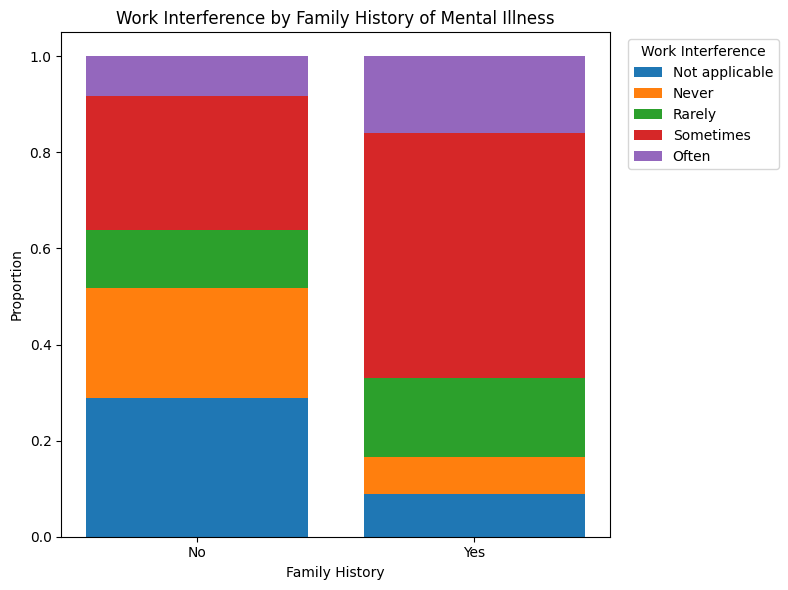

In [15]:
#질문1 가족력/치료 경험이 업무 방해(work_interfere)와 어떤 관련이 있는가?

#EDA 가족력이 있는 그룹과 없는 그룹에서 업무 방해 빈도 차이 비교
# 1) 교차표(행 기준 비율)
ct = pd.crosstab(df_final['family_history'], df_final['work_interfere'], normalize='index')
display(ct)

import matplotlib.pyplot as plt

# 2) 누적 막대그래프
fig, ax = plt.subplots(figsize=(8,6))

bottom = None
for col in ct.columns:
    ax.bar(ct.index.astype(str), ct[col].values, bottom=bottom, label=col)
    bottom = (ct[col].values if bottom is None else bottom + ct[col].values)

ax.set_title('Work Interference by Family History of Mental Illness')
ax.set_xlabel('Family History')
ax.set_ylabel('Proportion')
ax.legend(title='Work Interference', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

work_interfere,Not applicable,Never,Rarely,Sometimes,Often
treatment,,,,,
No,0.417476,0.292880,0.082524,0.173139,0.033981
Yes,0.006421,0.048154,0.192616,0.561798,0.191011


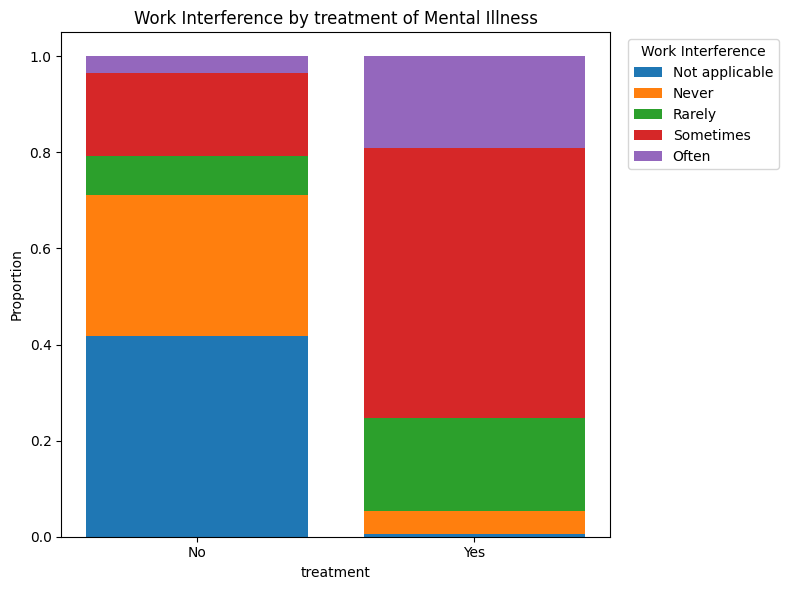

In [16]:
#EDA 치료경험이 있는 그룹과 없는 그룹에서 업무 방해 빈도 차이 비교
# 1) 교차표(행 기준 비율)
ct = pd.crosstab(df_final['treatment'], df_final['work_interfere'], normalize='index')
display(ct)

import matplotlib.pyplot as plt

# 2) 누적 막대그래프
fig, ax = plt.subplots(figsize=(8,6))

bottom = None
for col in ct.columns:
    ax.bar(ct.index.astype(str), ct[col].values, bottom=bottom, label=col)
    bottom = (ct[col].values if bottom is None else bottom + ct[col].values)

ax.set_title('Work Interference by treatment of Mental Illness')
ax.set_xlabel('treatment')
ax.set_ylabel('Proportion')
ax.legend(title='Work Interference', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df_final['family_history'], df_final['work_interfere'])
chi2, p, dof, expected = chi2_contingency(table)
print("p-value:", p)

table = pd.crosstab(df_final['treatment'], df_final['work_interfere'])
chi2, p, dof, expected = chi2_contingency(table)
print("p-value:", p)

p-value: 3.3690505307421064e-33
p-value: 3.387598111625005e-124


가족력 없음: “업무에 방해 안 된다(Not applicable + Never)”가 51.8% (≈ 절반).

가족력 있음: “업무에 방해된다 (Sometimes + Often)”가 67% 이상.

즉, 가족력이 있는 사람들이 업무 방해를 훨씬 더 자주 보고합니다.

카이제곱 검정 p-value = 3.37e-33 ≪ 0.05

→ 가족력과 업무 방해는 통계적으로 유의하게 연관

분석 결과, 가족력이 있는 응답자는 없는 응답자에 비해 정신건강 문제가 업무에 방해가 된다고 보고할 확률이 유의하게 높았다(p < 0.001). 특히 “Sometimes”와 “Often” 응답이 가족력 있는 집단에서 과반수를 차지하여, 가족력이 정신건강 문제의 위험 요인이 될 수 있음을 시사한다.

분석 결과, 정신건강 치료 경험과 업무 방해 경험 간에는 매우 강한 관련성이 나타났다(p < 0.001). 치료 경험이 없는 집단에서는 응답자의 약 70%가 업무에 방해가 없다고 보고한 반면, 치료 경험이 있는 집단에서는 75% 이상이 업무 수행에 방해가 된다고 응답하였다. 특히 치료 경험자 중 절반 이상이 “Sometimes”라고 답하여, 치료를 받을 정도의 정신건강 문제를 경험한 사람들은 실제로 업무 차질을 빈번하게 겪고 있음을 시사한다. 이는 정신건강 치료가 필요한 수준의 직원들은 업무 수행에서 더 큰 어려움을 겪을 수 있으며, 기업 차원의 지원과 이해가 필수적임을 보여준다.

In [21]:
#심화 분석 - 효과 크기 (Cramér’s V)
# Cramér’s V는 카이제곱 검정에서 나온 통계량을 가지고 두 범주형 변수 간 관련성의 강도(Effect size) 를 계산하는 지표
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # 교차표 생성
    table = pd.crosstab(x, y)
    
    # 카이제곱 검정
    chi2, p, dof, expected = chi2_contingency(table)
    
    # N: 전체 표본 수
    n = table.sum().sum()
    
    # Cramér’s V 계산
    r, k = table.shape
    phi2 = chi2 / n
    # bias correction (추천)
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    return v, p

v, p = cramers_v(df_final['family_history'], df_final['work_interfere'])
print(f"Cramér’s V: {v:.3f}, p-value: {p:.3e}")

v, p = cramers_v(df_final['treatment'], df_final['work_interfere'])
print(f"Cramér’s V: {v:.3f}, p-value: {p:.3e}")

Cramér’s V: 0.353, p-value: 3.369e-33
Cramér’s V: 0.682, p-value: 3.388e-124


In [32]:
# 데이터 사전 전처리
# 회사의 정신건강 지원 제도에서의 Not sure 응답을 No로 처리(지원 제도를 알지 못하는 것은 사실상 지원 부재로 간주)

# 변환할 컬럼들
support_cols = ['benefits', 'care_options', 'wellness_program']

for col in support_cols:
    s = df_final[col]

    # 1) dtype이 category인 경우
    if isinstance(s.dtype, pd.CategoricalDtype):
        # object로 풀었다가 치환 후 다시 카테고리화
        s = s.astype(str).replace("Don't know", "No")
    else:
        s = s.replace("Don't know", "No")

    # 2) 최종 카테고리: Yes/No 두 값으로 통일
    s = pd.Categorical(s, categories=['No', 'Yes'], ordered=True)

    df_final[col] = s

# 확인
for col in support_cols:
    print(col, df_final[col].dtype, df_final[col].cat.categories.tolist())
    print(df_final[col].value_counts(dropna=False), '\n')


benefits category ['No', 'Yes']
benefits
No     772
Yes    469
Name: count, dtype: int64 

care_options category ['No', 'Yes']
care_options
No     806
Yes    435
Name: count, dtype: int64 

wellness_program category ['No', 'Yes']
wellness_program
No     1018
Yes     223
Name: count, dtype: int64 



In [34]:
# 1) 새 그룹 라벨 생성 (벡터화)
df_final['support_group'] = (
    'B:' + df_final['benefits'].astype(str) +
    '_C:' + df_final['care_options'].astype(str) +
    '_W:' + df_final['wellness_program'].astype(str)
)

# 2) 8개 조합을 명시적으로 카테고리 순서로 지정 (원하는 정렬 순서를 바꿔도 됩니다)
order = [
    'B:No_C:No_W:No',
    'B:Yes_C:No_W:No',
    'B:No_C:Yes_W:No',
    'B:No_C:No_W:Yes',
    'B:Yes_C:Yes_W:No',
    'B:Yes_C:No_W:Yes',
    'B:No_C:Yes_W:Yes',
    'B:Yes_C:Yes_W:Yes'
]
df_final['support_group'] = pd.Categorical(df_final['support_group'], categories=order, ordered=True)

# 3) 확인 (각 그룹별 인원수)
print(df_final['support_group'].value_counts(dropna=False))

support_group
B:No_C:No_W:No       599
B:Yes_C:Yes_W:No     156
B:Yes_C:No_W:No      132
B:No_C:Yes_W:No      131
B:Yes_C:Yes_W:Yes    131
B:Yes_C:No_W:Yes      50
B:No_C:No_W:Yes       25
B:No_C:Yes_W:Yes      17
Name: count, dtype: int64


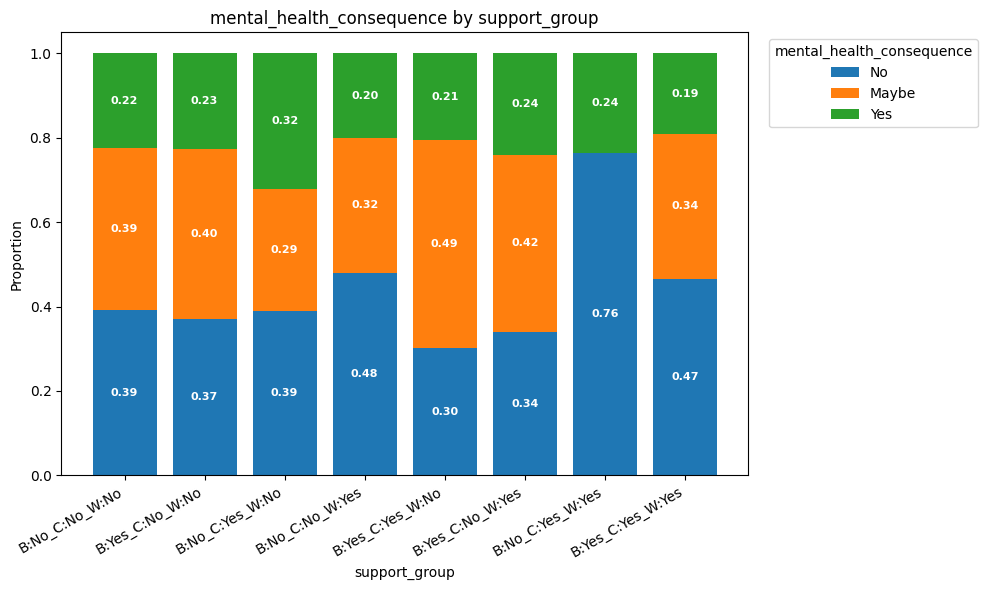

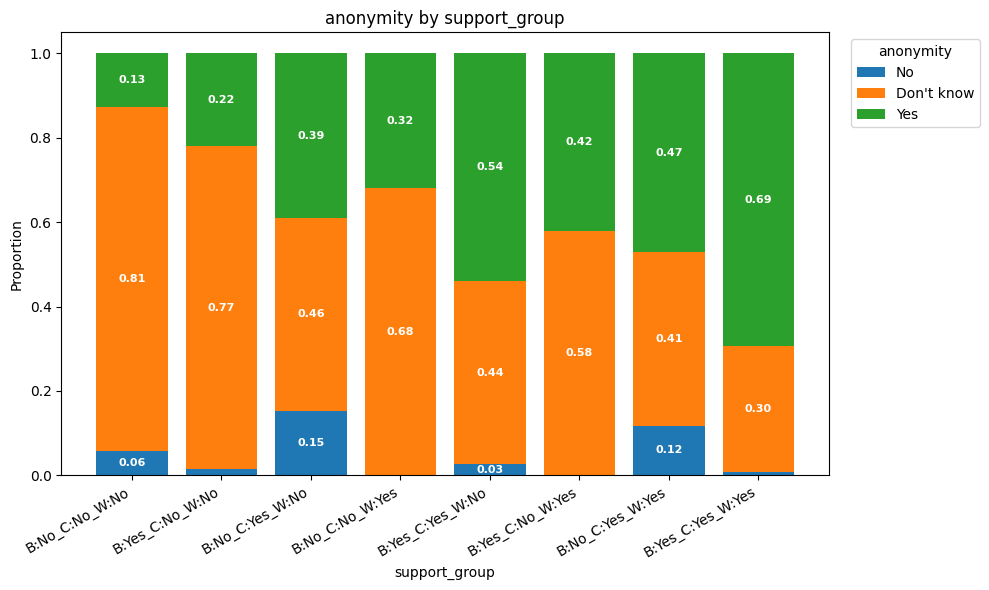

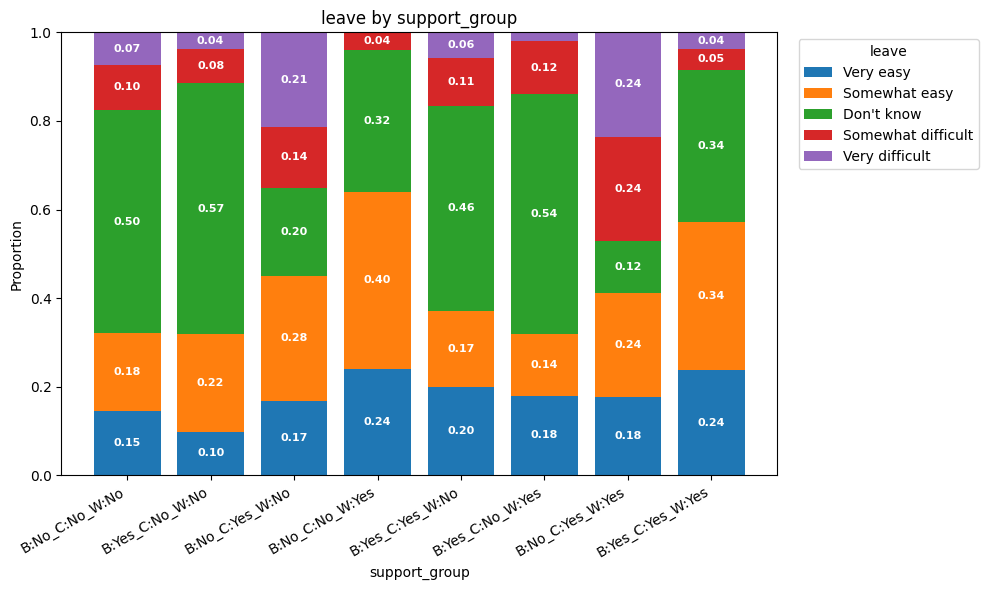

In [46]:
# --------- 0) 준비: 그룹/태도 변수 및 카테고리 순서 ---------
group_col = 'support_group'
group_order = [
    'B:No_C:No_W:No',
    'B:Yes_C:No_W:No',
    'B:No_C:Yes_W:No',
    'B:No_C:No_W:Yes',
    'B:Yes_C:Yes_W:No',
    'B:Yes_C:No_W:Yes',
    'B:No_C:Yes_W:Yes',
    'B:Yes_C:Yes_W:Yes'
]

targets = {
    # 고용주와 정신건강 논의 시 부정적 결과 예상 (순서: No → Maybe → Yes)
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    # 익명성 보장 인식 (순서: No → Don't know → Yes)
    'anonymity': ['No', "Don't know", 'Yes'],
    # 병가 용이성 (순서: Very easy → Somewhat easy → Don't know → Somewhat difficult → Very difficult)
    'leave': ['Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult'],
}

# --------- 1) 누적 막대그래프 함수 ---------
def plot_stacked_share_by_group(df, group_col, target_col, target_order, group_order=None, show_values=True):
    # 교차표 (비율)
    ct = pd.crosstab(df[group_col], df[target_col], normalize='index')

    # 순서 보정
    if group_order is None:
        group_order = sorted(ct.index.tolist())
    ct = ct.reindex(index=group_order, fill_value=0.0)
    ct = ct.reindex(columns=target_order, fill_value=0.0)

    # 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = [0] * len(ct)
    for col in ct.columns:
        vals = ct[col].values
        bars = ax.bar(ct.index.astype(str), vals, bottom=bottom, label=col)
        
        # ----- 수치(label) 표시 -----
        if show_values:
            for bar, v, b in zip(bars, vals, bottom):
                if v > 0.02:  # 2% 이상인 경우만 표시 (너무 작은 값은 생략)
                    ax.text(
                        bar.get_x() + bar.get_width()/2,
                        b + v/2,
                        f"{v:.2f}",
                        ha='center', va='center',
                        fontsize=8, color="white", fontweight="bold"
                    )
        bottom = bottom + vals

    ax.set_title(f'{target_col} by {group_col}')
    ax.set_xlabel(group_col)
    ax.set_ylabel('Proportion')
    ax.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

    return ct  # 필요 시 표를 리턴해 활용

# --------- 2) 각 태도 변수별 그래프 그리기 ---------
for tcol, torder in targets.items():
    # 카테고리 순서가 안 맞을 수 있으니 보정(선택)
    if tcol in df_final.columns:
        try:
            df_final[tcol] = pd.Categorical(df_final[tcol], categories=torder, ordered=True)
        except Exception:
            pass

    ct = plot_stacked_share_by_group(
        df=df_final,
        group_col=group_col,
        target_col=tcol,
        target_order=torder,
        group_order=group_order
    )
    # 선택: 확인용 표 출력
    #print(f'\n[Share table] {tcol}')
    #display(ct.round(3))